# Exploratory Data Analysis

* Which tweets got the most replies, retweets and favourites?
* Which MP has got the worst/best tweets? How do we measure this?
* Which parties have the most replies, retweets and favourites?
* What time do tweets occur?
* How does tweet activity change with time? e.g. 2015-2017 or during election periods.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv('processed_tweets.csv')

In [3]:
pd.set_option('display.max_colwidth',50)
df.head()

,Unnamed: 0,user_name,constituency,party,gender,tweet_id,permalink,text,date,retweets,favourites,replies,party_new
0,0,skinnock,Aberavon,Labour,Male,947017416047058944,https://twitter.com/SKinnock/status/9470174160...,Devastating resignation letter from Andrew Ado...,2017-12-30 08:12:01,17,43,11,Labour
1,1,skinnock,Aberavon,Labour,Male,944285195372548097,https://twitter.com/SKinnock/status/9442851953...,The gov need to act to allow more flexibility ...,2017-12-22 19:15:09,2,5,2,Labour
2,2,skinnock,Aberavon,Labour,Male,943841995390423040,https://twitter.com/SKinnock/status/9438419953...,Here are the fabled sector analyses. Damp squi...,2017-12-21 13:54:02,21,29,8,Labour
3,3,skinnock,Aberavon,Labour,Male,943595206225559552,https://twitter.com/SKinnock/status/9435952062...,"Fallon, Patel and now Green. Three strikes and...",2017-12-20 21:33:22,7,31,5,Labour
4,4,skinnock,Aberavon,Labour,Male,943552279189258245,https://twitter.com/SKinnock/status/9435522791...,Waiting to hear from @DavidGauke re my concern...,2017-12-20 18:42:48,3,1,1,Labour


In [4]:
df.describe()

,Unnamed: 0,tweet_id,retweets,favourites,replies
count,2.718003e+06,2.718003e+06,2.718003e+06,2.718003e+06,2.718003e+06
mean,1.359078e+06,5.057466e+17,1.032969e+01,1.461744e+01,2.555317e+00
std,7.846633e+05,2.725759e+17,1.600182e+02,3.409252e+02,2.718169e+01
min,0.000000e+00,4.797807e+08,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.795335e+05,2.937230e+17,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.359084e+06,5.315544e+17,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.038620e+06,7.395366e+17,3.000000e+00,3.000000e+00,1.000000e+00
max,2.718144e+06,9.477393e+17,6.240500e+04,1.580040e+05,1.478400e+04


## Top Tweets

* Which tweets have the most replies, retweets and favorites?

In [5]:
# Which tweets have the most retweets?
pd.set_option('display.max_colwidth', -1)
df[['user_name', 'text', 'retweets', 'date']].sort_values(by='retweets', ascending=False).head(10)

,user_name,text,retweets,date
2320612,davidlammy,"Trump sharing Britain First. Let that sink in. The President of the United States is promoting a fascist, racist, extremist hate group whose leaders have been arrested and convicted. He is no ally or friend of ours. @realDonaldTrump you are not welcome in my country and my city.",62405,2017-11-29 12:08:22
1273505,jeremycorbyn,"Cancellation of President Trump's State Visit is welcome, especially after his attack on London's mayor & withdrawal from #ParisClimateDeal .",50848,2017-06-11 14:47:54
650289,ed_miliband,"What an absolutely ludicrous, incompetent, absurd, make it up as you go along, couldn’t run a piss up in a brewery bunch of jokers there are running the government at the most critical time in a generation for the country.",45729,2017-12-05 08:23:18
650695,ed_miliband,Is this a parody account? https:// twitter.com/piersmorgan/st atus/822756556005588992 …,43174,2017-01-21 20:04:08
1273515,jeremycorbyn,". @Theresa_May thought that with the backing of the billionaires and the corporate elite, she could take your vote for granted. pic.twitter.com/JpazODKMEA",41675,2017-06-09 10:18:43
1273040,jeremycorbyn,Police violence against citizens in #Catalonia is shocking. The Spanish government must act to end it now.,40169,2017-10-01 13:33:16
1272775,jeremycorbyn,"Trump's recognition of Jerusalem as Israel's capital, including occupied Palestinian territory, is a reckless threat to peace. The British Government must condemn this dangerous act and work for a just and viable settlement of the conflict.",39109,2017-12-06 19:00:35
1274551,jeremycorbyn,"If you are neutral in situations of injustice, you have chosen the side of the oppressor. https:// twitter.com/indyusa/status /825379037317103616 …",36159,2017-01-28 18:27:40
650374,ed_miliband,Spreading lies about your own country: sad. Spreading lies about others: sadder. What an absolute moron. https:// twitter.com/realdonaldtrum p/status/921323063945453574 …,35195,2017-10-20 17:08:11
650636,ed_miliband,Breaking: I will shortly be announced as editor of Heat magazine....,34675,2017-03-17 11:55:17


In [6]:
# Which tweets have the most replies?
df[['user_name', 'text', 'replies', 'date']].sort_values(by='replies', ascending=False).head(10)

,user_name,text,replies,date
1537094,theresa_may,"The UK passport is an expression of our independence and sovereignty – symbolising our citizenship of a proud, great nation. That's why we have announced that the iconic #bluepassport will return after we leave the European Union in 2019. https://www. conservatives.com/sharethefacts/ 2017/12/blue-passports …",14784,2017-12-22 11:49:51
1537252,theresa_may,"I'm clear: if human rights laws get in the way of tackling extremism and terrorism, we will change those laws to keep British people safe. pic.twitter.com/8EfUJYUDMK",8769,2017-06-06 21:01:45
2324252,davidlammy,Wake up. We do not have to do this. We can stop this madness through a vote in Parliament. My statement below pic.twitter.com/V8f9Yo1TZd,8104,2016-06-25 16:36:56
1537285,theresa_may,If I lose just six seats I will lose this election and Jeremy Corbyn will be sitting down to negotiate with Europe: https://www. facebook.com/TheresaMayOffi cial/posts/1737355726281193 …,8074,2017-05-20 10:03:51
2336829,borisjohnson,Very very very clear - Corbyn will never protect us against our enemies.,7526,2017-06-02 21:43:29
1274512,jeremycorbyn,"Real fight starts now. Over next two years Labour will use every opportunity to ensure Brexit protects jobs, living standards & the economy.",5651,2017-02-08 21:08:35
2136061,garystreeterswd,This is why i hate social media. It gives a voice to people who dont deserve one https:// twitter.com/paulmasonnews/ status/880146404672512002 …,4943,2017-06-28 20:44:00
2320612,davidlammy,"Trump sharing Britain First. Let that sink in. The President of the United States is promoting a fascist, racist, extremist hate group whose leaders have been arrested and convicted. He is no ally or friend of ours. @realDonaldTrump you are not welcome in my country and my city.",4778,2017-11-29 12:08:22
1557954,nadinedorries,"Left wing snowflakes are killing comedy, tearing down historic statues, removing books from universities, dumbing down panto, removing Christ from Christmas and suppressing free speech. Sadly, it must be true, history does repeat itself. It will be music next.",4718,2017-12-27 11:02:44
2336895,borisjohnson,I genuinely think it is important people know Corbyn claimed in recent days he never met the IRA. You cannot trust this man! pic.twitter.com/vyP6fUo0iw,4614,2017-05-27 19:37:20


In [7]:
# Which tweets have the most favourites?
df[['user_name', 'text', 'favourites', 'date']].sort_values(by='favourites', ascending=False).head(10)

,user_name,text,favourites,date
1273505,jeremycorbyn,"Cancellation of President Trump's State Visit is welcome, especially after his attack on London's mayor & withdrawal from #ParisClimateDeal .",158004,2017-06-11 14:47:54
2320612,davidlammy,"Trump sharing Britain First. Let that sink in. The President of the United States is promoting a fascist, racist, extremist hate group whose leaders have been arrested and convicted. He is no ally or friend of ours. @realDonaldTrump you are not welcome in my country and my city.",156889,2017-11-29 12:08:22
650289,ed_miliband,"What an absolutely ludicrous, incompetent, absurd, make it up as you go along, couldn’t run a piss up in a brewery bunch of jokers there are running the government at the most critical time in a generation for the country.",116351,2017-12-05 08:23:18
650374,ed_miliband,Spreading lies about your own country: sad. Spreading lies about others: sadder. What an absolute moron. https:// twitter.com/realdonaldtrum p/status/921323063945453574 …,94371,2017-10-20 17:08:11
650695,ed_miliband,Is this a parody account? https:// twitter.com/piersmorgan/st atus/822756556005588992 …,88687,2017-01-21 20:04:08
1273515,jeremycorbyn,". @Theresa_May thought that with the backing of the billionaires and the corporate elite, she could take your vote for granted. pic.twitter.com/JpazODKMEA",87102,2017-06-09 10:18:43
650280,ed_miliband,And mine for people who travel thousands of miles to endorse a groper of young girls who also happens to be a racist homophobe. Time for a period of silence. https:// twitter.com/nigel_farage/s tatus/941028309772718080 …,86061,2017-12-13 22:25:43
1273516,jeremycorbyn,"Whatever the final result, our positive campaign has changed politics for the better. pic.twitter.com/EHLta2rnIW",83352,2017-06-09 01:35:07
650636,ed_miliband,Breaking: I will shortly be announced as editor of Heat magazine....,74885,2017-03-17 11:55:17
1273360,jeremycorbyn,"Dear @theresa_may , you asked for ideas so I've sent you our manifesto. I hope it helps to “clarify and improve” your policies #ForTheMany pic.twitter.com/mWu1ezlzLQ",74276,2017-07-11 18:29:08


### Labour vs Conservative.

* We can see some trends here. Labour seem to dominate the retweets/favourites whilst the tweets with the most replies seem to have much more Conservative representation. Could look at the ratio of replies to retweets/favourites. See http://www.esquire.com/news-politics/news/a54440/twitter-ratio-reply/

In [8]:
#Create ratio column

def add_ratio(row):
    """
    Create column where the we have the ratio of replies to retweets and favourites
    
    """
    replies = row['replies']
    likes_retweets = row['retweets']+ row['favourites']
    
    if likes_retweets == 0:
        
        return None
    
    else:
    
        return float(replies) / float(likes_retweets)

In [9]:
df['ratio'] = df[['retweets', 'replies', 'favourites']].apply(add_ratio,axis=1)

In [10]:
pd.set_option('display.max_colwidth', 50)
df.head()

,Unnamed: 0,user_name,constituency,party,gender,tweet_id,permalink,text,date,retweets,favourites,replies,party_new,ratio
0,0,skinnock,Aberavon,Labour,Male,947017416047058944,https://twitter.com/SKinnock/status/9470174160...,Devastating resignation letter from Andrew Ado...,2017-12-30 08:12:01,17,43,11,Labour,0.183333
1,1,skinnock,Aberavon,Labour,Male,944285195372548097,https://twitter.com/SKinnock/status/9442851953...,The gov need to act to allow more flexibility ...,2017-12-22 19:15:09,2,5,2,Labour,0.285714
2,2,skinnock,Aberavon,Labour,Male,943841995390423040,https://twitter.com/SKinnock/status/9438419953...,Here are the fabled sector analyses. Damp squi...,2017-12-21 13:54:02,21,29,8,Labour,0.160000
3,3,skinnock,Aberavon,Labour,Male,943595206225559552,https://twitter.com/SKinnock/status/9435952062...,"Fallon, Patel and now Green. Three strikes and...",2017-12-20 21:33:22,7,31,5,Labour,0.131579
4,4,skinnock,Aberavon,Labour,Male,943552279189258245,https://twitter.com/SKinnock/status/9435522791...,Waiting to hear from @DavidGauke re my concern...,2017-12-20 18:42:48,3,1,1,Labour,0.250000


In [11]:
# Which tweets have the 'worst' ratio?
# Note that this is quite a poor measure. Can we come up with something better?
pd.set_option('display.max_colwidth', -1)
df[['user_name', 'text', 'ratio', 'date', 'retweets', 'favourites', 'replies']].sort_values(by='ratio', ascending=False).head()

,user_name,text,ratio,date,retweets,favourites,replies
2476267,tom_watson,Sorting out a playlist for Christmas day. Any ideas?,168.0,2013-12-24 09:38:12,1,0,168
820681,tpearce003,How do we make the fit-for-work tests fit for purpose? http://www. newstatesman.com/politics/2015/ 03/how-do-we-make-fit-work-tests-fit-purpose …,74.0,2015-03-10 08:23:59,1,0,74
1701091,normanlamb,@SavetheHavenUK @Bob4Colchester @drdanpoulter @bernardjenkin It's on Tuesday! Keep strong!,65.0,2015-03-12 23:19:14,1,0,65
2488047,tom_watson,"I've not seen, heard nor read a thing about the PM's speech. How was it for you? What did he say?",63.5,2012-10-10 17:52:42,1,1,127
1946607,rhonddabryant,What to say on #bbcqt tonight?,57.0,2013-05-16 17:36:57,0,1,57


## Party Proportions

* What proportion of the top 100 tweets does each party have?

In [12]:
retweets_grouped = df[['retweets',
                       'party_new']].sort_values(by='retweets', ascending=False).head(100).groupby('party_new')

retweets_grouped = retweets_grouped.count()

replies_grouped = df[['replies',
                       'party_new']].sort_values(by='replies', ascending=False).head(100).groupby('party_new')

replies_grouped = replies_grouped.count()

retweets_grouped = retweets_grouped.merge(replies_grouped,how='outer',left_index=True, right_index=True)

faves_grouped = df[['favourites',
                       'party_new']].sort_values(by='favourites', ascending=False).head(100).groupby('party_new')

faves_grouped = faves_grouped.count()

retweets_grouped = retweets_grouped.merge(faves_grouped,how='outer',left_index=True, right_index=True)


ratio_grouped = df[['ratio',
                       'party_new']].sort_values(by='ratio', ascending=False).head(100).groupby('party_new')

ratio_grouped = ratio_grouped.count()

retweets_grouped = retweets_grouped.merge(ratio_grouped,how='outer',left_index=True, right_index=True)

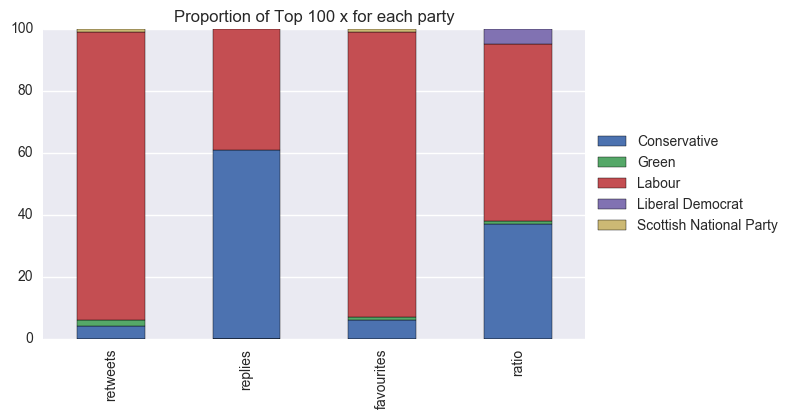

In [13]:
fig, ax = plt.subplots(figsize=(7,4))

retweets_grouped.transpose().plot(kind='bar', stacked=True, ax=ax)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Proportion of Top 100 x for each party')

## Average Values for Each Party

* How many retweets, replies, favourites does the average tweet get for each party?
* What is the average ratio for each party?
* Can we plot distributions?

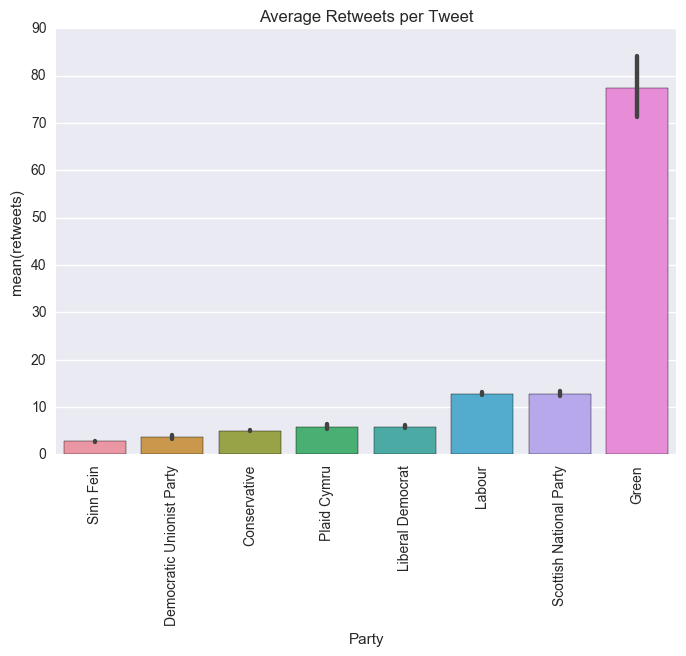

In [14]:
#Average retweets for each party
order =list(df.groupby('party_new').mean()['retweets'].sort_values(ascending=True).index)

sns.barplot(x=df['party_new'], y=df['retweets'], order=order)
plt.xticks(rotation=90)
plt.xlabel('Party')
plt.title('Average Retweets per Tweet')

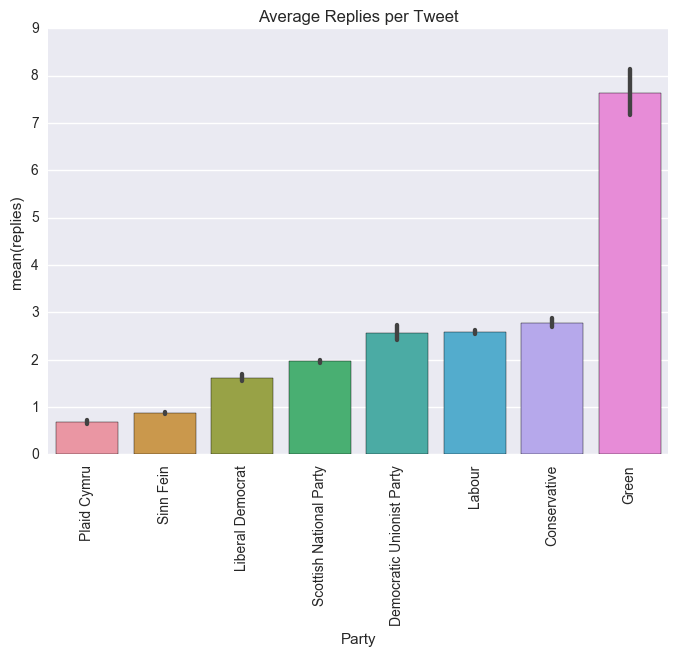

In [15]:
#Average number of replies for each party
order =list(df.groupby('party_new').mean()['replies'].sort_values(ascending=True).index)

sns.barplot(x=df['party_new'], y=df['replies'], order=order)
plt.xticks(rotation=90)
plt.xlabel('Party')
plt.title('Average Replies per Tweet')

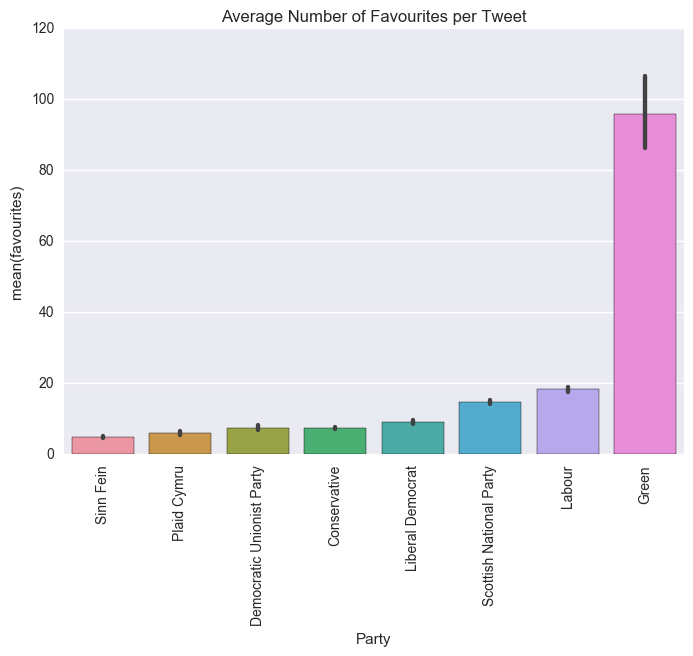

In [16]:
#Average number of favourites for each party
order =list(df.groupby('party_new').mean()['favourites'].sort_values(ascending=True).index)

sns.barplot(x=df['party_new'], y=df['favourites'], order=order)
plt.xticks(rotation=90)
plt.xlabel('Party')
plt.title('Average Number of Favourites per Tweet')

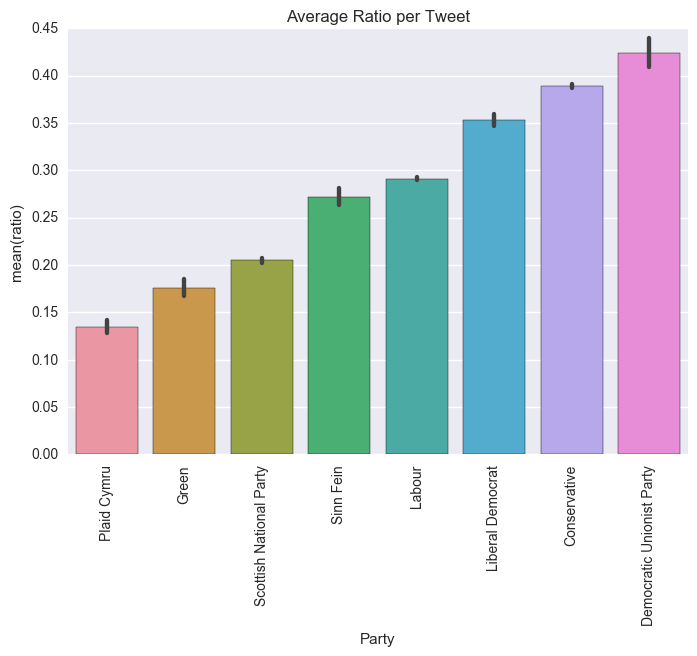

In [17]:
#Average ratio for each party
order =list(df.groupby('party_new').mean()['ratio'].sort_values(ascending=True).index)

sns.barplot(x=df['party_new'], y=df['ratio'], order=order)
plt.xticks(rotation=90)
plt.xlabel('Party')
plt.title('Average Ratio per Tweet')

## Tweet Timings

* Volume of tweets over time

* Time of week/day calculations

In [18]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('party', axis=1, inplace=True)

In [19]:
df['date'] = pd.to_datetime(df['date'])

In [20]:
from datetime import datetime

def get_day_of_week(row):
    
    return row['date'].weekday()

def get_hour_of_day(row):
    
    return row['date'].hour
    
def year_month(row):
    
    return '{year}-{month}'.format(year=row['date'].year, month=row['date'].month)

def unique_day(row):
    
    return str(row['date'].date())

df['day'] = df[['date']].apply(get_day_of_week, axis=1)
df['hour'] = df[['date']].apply(get_hour_of_day, axis=1)
df['year_month'] = df[['date']].apply(year_month, axis=1)
df['unique_day'] = df[['date']].apply(unique_day, axis=1)

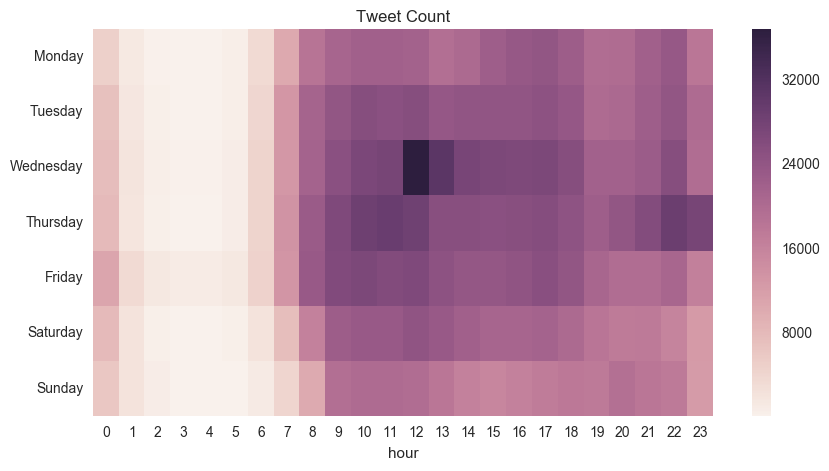

In [21]:
#Create heatmap of tweet count for each hour/day combination 

times = df.pivot_table(index='day', columns='hour', values='tweet_id', aggfunc='count')

index = ['Monday',
        'Tuesday',
        'Wednesday',
        'Thursday',
        'Friday',
        'Saturday',
        'Sunday']

times.index =index

fig, ax = plt.subplots(figsize=(10,5))

sns.heatmap(data=times)

plt.title('Tweet Count')

* PMQs on a Wednesday afternoon clearly visible!

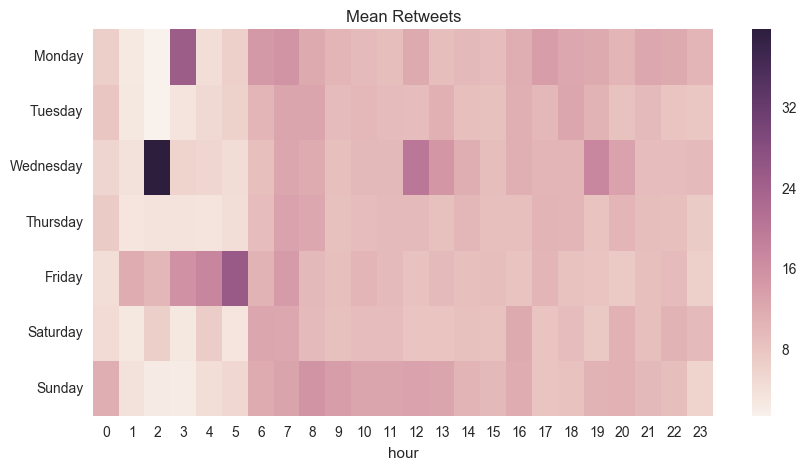

In [22]:
#Create heatmap of average number of retweets for hour/day combination 


times = df.pivot_table(index='day', columns='hour', values='retweets', aggfunc='mean')

index = ['Monday',
        'Tuesday',
        'Wednesday',
        'Thursday',
        'Friday',
        'Saturday',
        'Sunday']

times.index =index

fig, ax = plt.subplots(figsize=(10,5))

sns.heatmap(data=times)

plt.title('Mean Retweets')

There is a wierd peak on Wednesday at 2-3. Probably just an outlier, but let's check. The table below confirms this. Seems to be a tweet by stewartmcdonald about the US election that threw everything out. Could use median instead on mean? 

Also interesting that the period Friday 1-6 is quite busy. Probably because that is when election results are announced.

In [23]:
df[(df['day']==2) & (df['hour']==2)].sort_values('retweets', ascending=False).head(2)

,user_name,constituency,gender,tweet_id,permalink,text,date,retweets,favourites,replies,party_new,ratio,day,hour,year_month,unique_day
928638,stewartmcdonald,Glasgow South,Male,796183745581682688,https://twitter.com/StewartMcDonald/status/796183745581682688,Imagine what the next 4 years will be like for young LGBT Americans who will have a VP who believes in conversion therapy.,2016-11-09 02:52:51,25780,36469,188,Scottish National Party,0.003020,2,2,2016-11,2016-11-09
928639,stewartmcdonald,Glasgow South,Male,796183103580635137,https://twitter.com/StewartMcDonald/status/796183103580635137,"So next time you hear 'oh but you've got gay rights', always remember there are people who'd gladly take them away if given the chance. https:// twitter.com/stewartmcdonal d/status/796182695793532928 …",2016-11-09 02:50:18,705,1264,2,Scottish National Party,0.001016,2,2,2016-11,2016-11-09


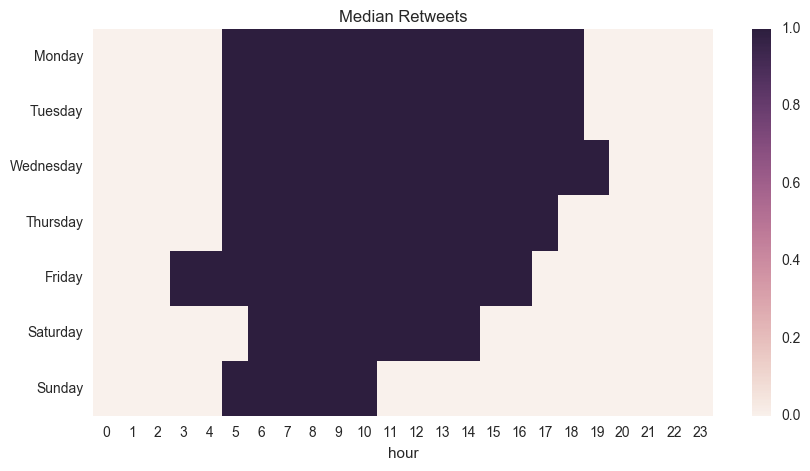

In [24]:
# Redo above plot with median instead
# Create heatmap of median number of retweets for hour/day combination
# Median works ok, but the extreme distrution of retweets means that the median is very low.


times = df.pivot_table(index='day', columns='hour', values='retweets', aggfunc='median')

index = ['Monday',
        'Tuesday',
        'Wednesday',
        'Thursday',
        'Friday',
        'Saturday',
        'Sunday']

times.index =index

fig, ax = plt.subplots(figsize=(10,5))

sns.heatmap(data=times)

plt.title('Median Retweets')

In [25]:
# Now lets have a look at how tweet volume has changed over time.
# Note that this dataset only has people who were mps elected in 2017 \
# therefore a lot of these people won't have been MPs when they made the tweet!
# Could maybe add a column is_mp for if the MP was actually an MP when they made the tweet.

grouped = df[['tweet_id', 'year_month', 'party_new']].groupby(['year_month', 'party_new']).count()

In [26]:
grouped.reset_index(inplace=True)
grouped['year_month'] =pd.to_datetime(grouped['year_month'])

#exclude last month on 2017 as this is when we collected

grouped =grouped[grouped['year_month'] < '2017-12-01']

In [27]:
time_data = grouped.pivot_table(index='year_month', columns='party_new')

time_data.columns = time_data.columns.droplevel()

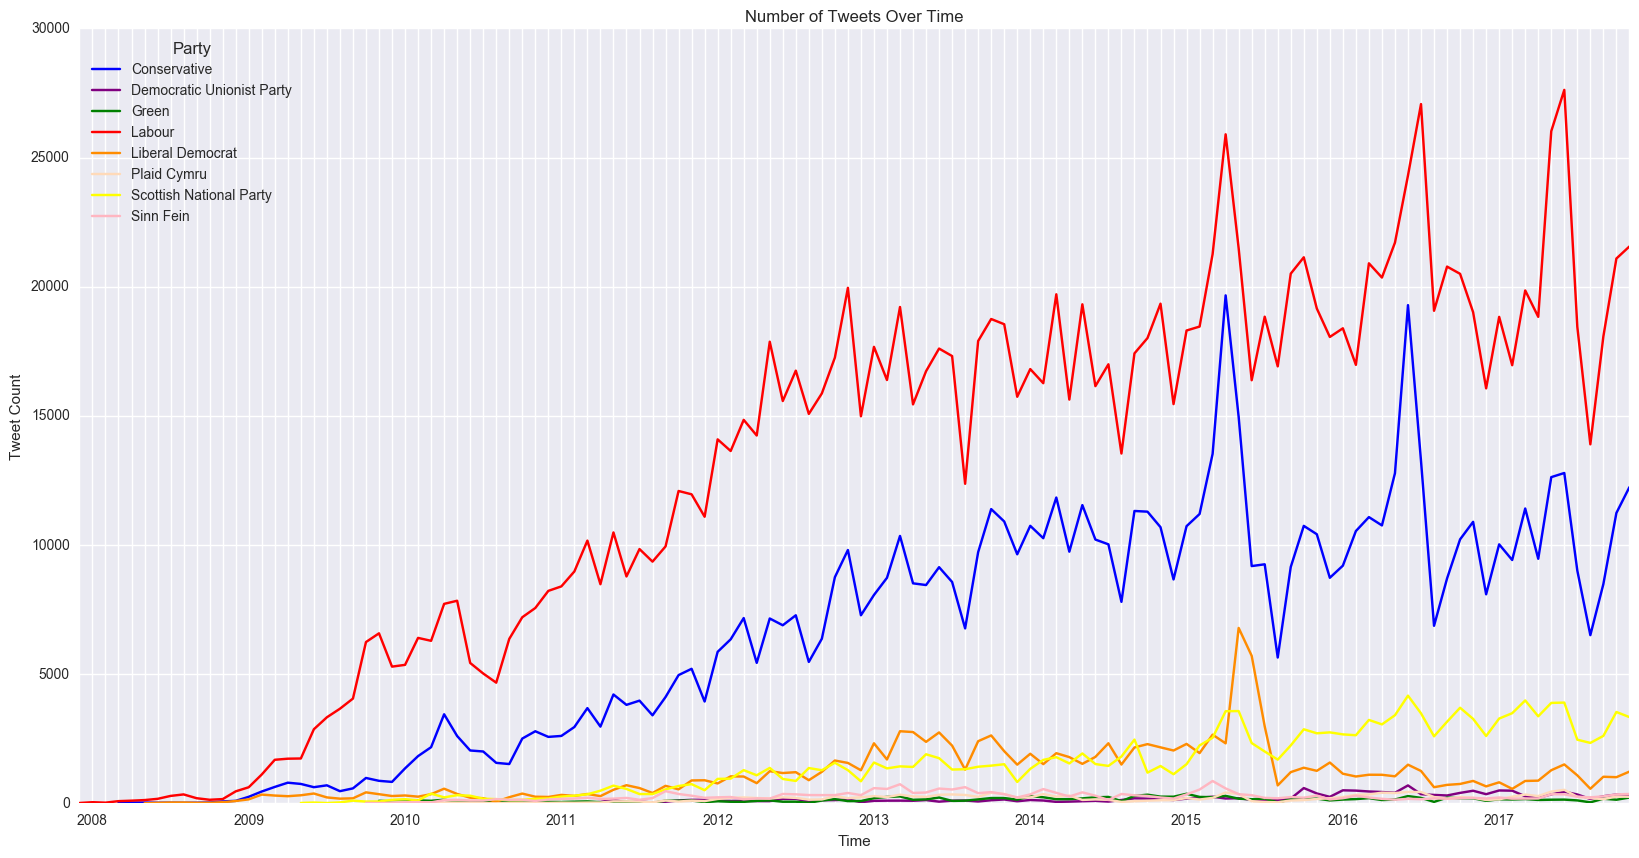

In [28]:
import matplotlib.dates as mdates


fig, ax = plt.subplots(figsize=(20,10))
colours = ['b', 'purple', 'g', 'r', 'darkorange', 'peachpuff', 'yellow', 'lightpink']
time_data.plot(ax=ax, color=colours,xticks=time_data.index)
plt.title('Number of Tweets Over Time')
plt.ylabel('Tweet Count')
plt.xlabel('Time')
plt.legend(title='Party', loc='upper left')

Events that can be seen in the above figure include:

* 2015 election
* Brexit Referendum
* 2017 election
* Summer recess

Also note how the conservative tweet count does not peak as much as it did in previous votes in 2017. Was this a failure in social media strategy?

### Busiest days

* Which days had the most tweets?

In [29]:
grouped = df[['tweet_id', 'unique_day']].groupby(['unique_day']).count()

In [30]:
grouped.sort_values('tweet_id', ascending=False).head(10)

,tweet_id
unique_day,
2015-05-07,4798
2017-06-08,4312
2015-05-08,3933
2015-04-02,3846
2017-06-09,3375
2017-11-22,3137
2015-05-06,3095
2017-06-07,2720
2016-06-24,2714


Most of these dates appear to be on or around the days of elections/referenda which makes sense.

### Correlations

In [31]:
df['length'] = df.apply(lambda x: len(str(x['text'])), axis=1)

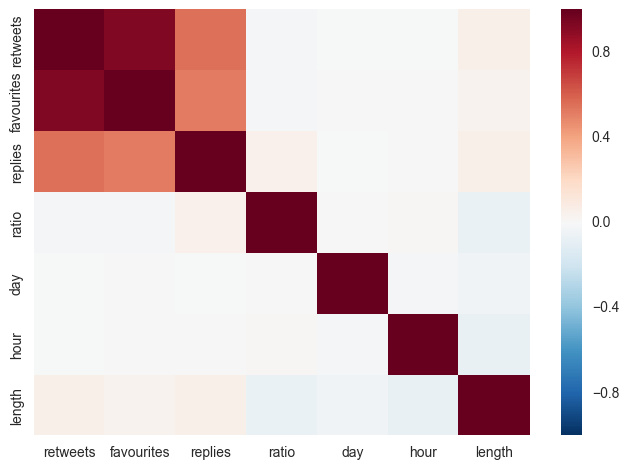

In [34]:
sns.heatmap(df.drop('tweet_id', axis=1).corr())

In [39]:
df.pivot(index='day',columns='hour', values='tweet_id')

ValueError: Index contains duplicate entries, cannot reshape